In [1]:
from aif360.datasets import StandardDataset
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
custom_colors = ['#784888', '#94b3c4', '#897cac', '#d8bfd4', '#f6e8e7']
#custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
#complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

#full_palette = custom_colors + complementary_colors
#sns.set_palette(full_palette)

sns.set_palette(custom_colors)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 45
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] =35

In [3]:
df = pd.read_pickle("../data/wesad/wesad_dataset_merged.pkl")
df = df[df['stress'].notna()]
df

id        EDA_0        EDA_1        EDA_2        EDA_3        TEMP_0  \
0       2  5452.450365  5366.846848  5264.122627  5115.746165  10279.722091   
1       2  5264.122627  5115.746165  5127.156998  5013.021944  10279.722091   
2       2  5127.156998  5013.021944  5372.556718  5235.591090  10279.722091   
3       2  5372.556718  5235.591090  5184.228979  5155.692989  10279.722091   
4       2  5184.228979  5155.692989  5115.746165  5081.504758  10464.748540   
...    ..          ...          ...          ...          ...           ...   
78761  17 -1141.515991 -1141.515991 -1146.439053 -1141.515991 -11412.917628   
78762  17 -1146.439053 -1141.515991 -1141.515991 -1141.515991 -11802.683112   
78763  17 -1141.515991 -1141.515991 -1136.589079 -1151.365964 -11802.683112   
78764  17 -1136.589079 -1151.365964 -1141.515991 -1141.515991 -11802.683112   
78765  17 -1141.515991 -1141.515991 -1136.589079 -1151.365964 -11802.683112   

             TEMP_1        TEMP_2        TEMP_3      ACC1_0  ...      BVP_58  \
0      10279.722091  10279.722091  10279.722091  126.326243  ... -137.408002   
1      10279.722091  10279.722091  10279.722091   90.734562  ...   25.850055   
2      10279.722091  10279.722091  10279.722091  -27.904372  ...   31.562887   
3      10279.722091  10464.748540  10464.748540  -27.904372  ...  -83.391734   
4      10464.748540  10464.748540  10464.748540  -39.768266  ...   -2.358440   
...             ...           ...           ...         ...  ...         ...   
78761 -11802.683112 -11802.683112 -11802.683112   57.652528  ...   12.233733   
78762 -11802.683112 -11802.683112 -11802.683112   57.652528  ...  -20.092160   
78763 -11802.683112 -11802.683112 -11802.683112   57.652528  ...   11.322788   
78764 -11802.683112 -11802.683112 -11412.917628   57.652528  ...   -3.189070   
78765 -11412.917628 -11412.917628 -11412.917628   57.652528  ...    0.125757   

           BVP_59      BVP_60     BVP_61     BVP_62     BVP_63  stress  \
0     -128.387507 -111.782506 -91.536409 -71.450360 -54.013997     0.0   
1       23.818332   23.653838  23.849453  23.195923  21.515416     0.0   
2       28.882079   28.415272  27.312718  22.711332  13.432982     0.0   
3      -65.897576  -45.375840 -26.334550 -12.494826  -5.474934     0.0   
4       -2.225067   -2.042790  -1.833838  -1.958320  -2.878597     0.0   
...           ...         ...        ...        ...        ...     ...   
78761   11.664393   10.917924   9.918415   8.640562   7.097016     0.0   
78762  -16.562248  -12.918468  -9.186125  -5.339913  -1.519005     0.0   
78763   10.753448   10.146151   9.526202   8.868298   8.045917     0.0   
78764   -0.544800    2.213339   4.908218   7.350056   9.450290     0.0   
78765   -1.379833   -2.860118  -4.340404  -5.833341  -7.402191     0.0   

       gender  BMI  age  
0           0    2    0  
1           0    2    0  
2           0    2    0  
3           0    2    0  
4           0    2    0  
...       ...  ...  ...  
78761       1    1    0  
78762       1    1    0  
78763       1    1    0  
78764       1    1    0  
78765       1    1    0  

[78766 rows x 173 columns]

# Significant relations between labels and protected attributes

In [4]:
demographic_variables = ['age', 'gender', 'BMI']
target_variables = ['stress']

def perform_chi2_test(df, demographic_variable, target_variable):
    contingency_table = pd.crosstab(df[demographic_variable], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

results_df = pd.DataFrame(columns=['Demographic Variable', 'Target Variable', 'Chi-square Statistic', 'p-value'])

for demographic_variable in demographic_variables:
    for target_variable in target_variables:
        chi2, p = perform_chi2_test(df, demographic_variable, target_variable)
        temp_df = pd.DataFrame({
            'Demographic Variable': [demographic_variable],
            'Target Variable': [target_variable],
            'Chi-square Statistic': [chi2],
            'p-value': [p]
        })
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_24544\2936582785.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


Demographic Variable Target Variable  Chi-square Statistic   p-value
0                  age          stress              2.091222  0.148147
1               gender          stress              7.803612  0.005214
2                  BMI          stress              4.469194  0.107035

# Representation bias

In [5]:
ratios = {
    'Category': ['gender', 'age', 'bmi'],
    'Dataset Ratios': [0.8, 0.93, 0.73], # male, below 30, normal
    'Real EU Ratios': [0.48, 0.32, 0.45] # male, below 30, normal
}

ratios_df = pd.DataFrame(ratios)
ratios_df

Category  Dataset Ratios  Real EU Ratios
0   gender            0.80            0.48
1      age            0.93            0.32
2      bmi            0.73            0.45

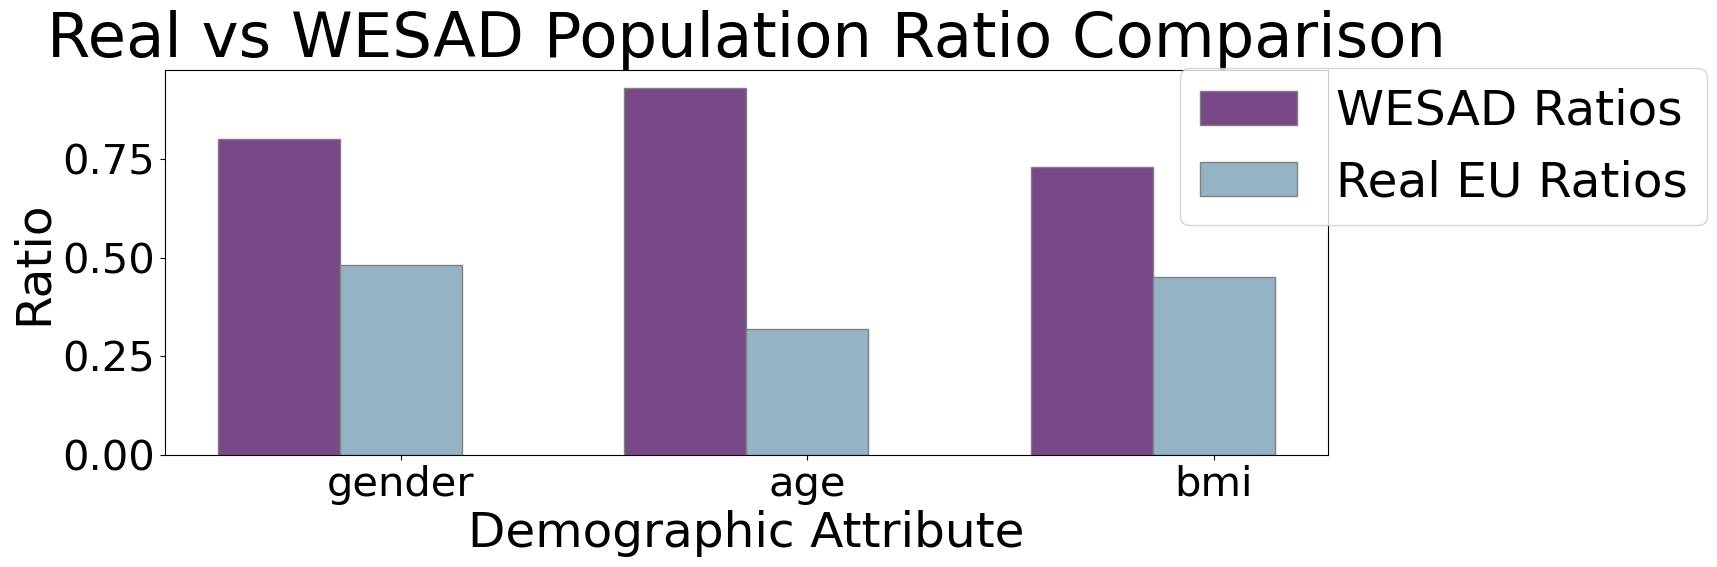

In [6]:
plt.figure(figsize=(15, 5))

barWidth = 0.3

r1 = range(len(ratios_df))
r2 = [x + barWidth for x in r1]

plt.bar(r1, ratios_df['Dataset Ratios'], color='#784888', width=barWidth, edgecolor='grey', label='WESAD Ratios')
plt.bar(r2, ratios_df['Real EU Ratios'], color='#94b3c4', width=barWidth, edgecolor='grey', label='Real EU Ratios')

plt.xlabel('Demographic Attribute')
plt.xticks([r + barWidth for r in range(len(ratios_df))], ratios_df['Category'])
plt.ylabel('Ratio')
plt.title('Real vs WESAD Population Ratio Comparison')
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.savefig("../visualizations/wesad/representation-biasWESAD.png",bbox_inches='tight')
plt.savefig("../visualizations/wesad/representation-biasWESAD.eps",bbox_inches='tight')
plt.show()

# Data Biases

In [7]:
df = df.drop(columns=['id'])
df

EDA_0        EDA_1        EDA_2        EDA_3        TEMP_0  \
0      5452.450365  5366.846848  5264.122627  5115.746165  10279.722091   
1      5264.122627  5115.746165  5127.156998  5013.021944  10279.722091   
2      5127.156998  5013.021944  5372.556718  5235.591090  10279.722091   
3      5372.556718  5235.591090  5184.228979  5155.692989  10279.722091   
4      5184.228979  5155.692989  5115.746165  5081.504758  10464.748540   
...            ...          ...          ...          ...           ...   
78761 -1141.515991 -1141.515991 -1146.439053 -1141.515991 -11412.917628   
78762 -1146.439053 -1141.515991 -1141.515991 -1141.515991 -11802.683112   
78763 -1141.515991 -1141.515991 -1136.589079 -1151.365964 -11802.683112   
78764 -1136.589079 -1151.365964 -1141.515991 -1141.515991 -11802.683112   
78765 -1141.515991 -1141.515991 -1136.589079 -1151.365964 -11802.683112   

             TEMP_1        TEMP_2        TEMP_3      ACC1_0      ACC1_1  ...  \
0      10279.722091  10279.722091  10279.722091  126.326243  233.101284  ...   
1      10279.722091  10279.722091  10279.722091   90.734562   78.870669  ...   
2      10279.722091  10279.722091  10279.722091  -27.904372  -63.496052  ...   
3      10279.722091  10464.748540  10464.748540  -27.904372  -27.904372  ...   
4      10464.748540  10464.748540  10464.748540  -39.768266  -39.768266  ...   
...             ...           ...           ...         ...         ...  ...   
78761 -11802.683112 -11802.683112 -11802.683112   57.652528   57.652528  ...   
78762 -11802.683112 -11802.683112 -11802.683112   57.652528   57.652528  ...   
78763 -11802.683112 -11802.683112 -11802.683112   57.652528   57.652528  ...   
78764 -11802.683112 -11802.683112 -11412.917628   57.652528   57.652528  ...   
78765 -11412.917628 -11412.917628 -11412.917628   57.652528   57.652528  ...   

           BVP_58      BVP_59      BVP_60     BVP_61     BVP_62     BVP_63  \
0     -137.408002 -128.387507 -111.782506 -91.536409 -71.450360 -54.013997   
1       25.850055   23.818332   23.653838  23.849453  23.195923  21.515416   
2       31.562887   28.882079   28.415272  27.312718  22.711332  13.432982   
3      -83.391734  -65.897576  -45.375840 -26.334550 -12.494826  -5.474934   
4       -2.358440   -2.225067   -2.042790  -1.833838  -1.958320  -2.878597   
...           ...         ...         ...        ...        ...        ...   
78761   12.233733   11.664393   10.917924   9.918415   8.640562   7.097016   
78762  -20.092160  -16.562248  -12.918468  -9.186125  -5.339913  -1.519005   
78763   11.322788   10.753448   10.146151   9.526202   8.868298   8.045917   
78764   -3.189070   -0.544800    2.213339   4.908218   7.350056   9.450290   
78765    0.125757   -1.379833   -2.860118  -4.340404  -5.833341  -7.402191   

       stress  gender  BMI  age  
0         0.0       0    2    0  
1         0.0       0    2    0  
2         0.0       0    2    0  
3         0.0       0    2    0  
4         0.0       0    2    0  
...       ...     ...  ...  ...  
78761     0.0       1    1    0  
78762     0.0       1    1    0  
78763     0.0       1    1    0  
78764     0.0       1    1    0  
78765     0.0       1    1    0  

[78766 rows x 172 columns]

In [8]:
df['gender'].value_counts()

gender
0    62924
1    15842
Name: count, dtype: int64

In [9]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [10]:
df['gender'].value_counts()

gender
0    62924
1    15842
Name: count, dtype: int64

In [11]:
df['age'].value_counts()

age
0    73492
1     5274
Name: count, dtype: int64

In [12]:
df['age'] = df['age'].replace({'< 30': 0, '>= 30': 1})

In [13]:
df['age'].value_counts()

age
0    73492
1     5274
Name: count, dtype: int64

In [14]:
df['BMI'].value_counts()

BMI
1    57936
2    15528
0     5302
Name: count, dtype: int64

In [15]:
df['BMI'] = df['BMI'].replace({'Normal': 0, 'Overweight': 1, 'Underweight':'2'})

In [16]:
df['BMI'].value_counts()

BMI
1    57936
2    15528
0     5302
Name: count, dtype: int64

In [17]:
protected_attributes = ['gender', 'age', 'BMI']
privileged_classes = [[0], [0], [0]] # male, below 30 years old

dataset = StandardDataset(df,
                          label_name='stress',
                          favorable_classes=[0],  # not a favorable outcome, but perhaps the most important or most desorable
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

df_bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'statistical_parity_difference', 'disparate_impact_ratio'])

for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)

    # Using mean_difference() value as Statistical Parity Difference for explicit naming
    spd = metric_data.mean_difference()

    df_bias_columns_metric.loc[len(df_bias_columns_metric.index)] = [attr, spd, metric_data.disparate_impact()]

    print("Group Fairness - Statistical Parity Difference: {}".format(spd))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))

df_bias_columns_metric


Evaluating Outcome Bias for gender
Group Fairness - Statistical Parity Difference: -0.01083530982173464
Group Fairness - Disparate Impact Ratio: 0.9855360635745507

Evaluating Outcome Bias for age
Group Fairness - Statistical Parity Difference: 0.009064130373333645
Group Fairness - Disparate Impact Ratio: 1.012144777928843

Evaluating Outcome Bias for BMI
Group Fairness - Statistical Parity Difference: 0.002019267921491097
Group Fairness - Disparate Impact Ratio: 1.0027159204768508


protected_attribute  statistical_parity_difference  disparate_impact_ratio
0              gender                      -0.010835                0.985536
1                 age                       0.009064                1.012145
2                 BMI                       0.002019                1.002716

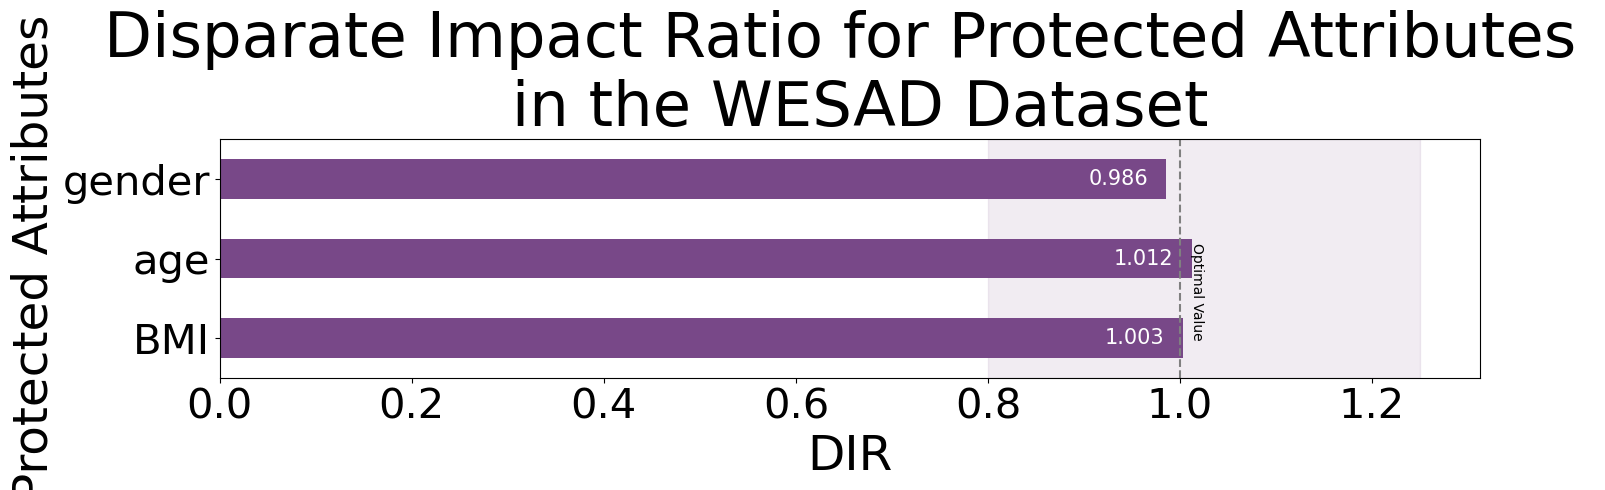

In [18]:
df_bias_columns_metric['Label'] = 'stress'
pivot_df = df_bias_columns_metric.pivot(index='protected_attribute', columns='Label', values='disparate_impact_ratio')


pivot_df.plot(kind='barh', figsize=(15, 5), legend=False)

# Add the vertical line and shaded area
plt.axvline(x=1.0, color='gray', linestyle='--')
plt.axvspan(0.8, 1.25, color='#784888', alpha=0.1)
plt.text(1.01, 0, 'Optimal Value', rotation=270)

# Set labels and title
plt.ylabel('Protected Attributes')
plt.xlabel('DIR')
plt.title('Disparate Impact Ratio for Protected Attributes \n in the WESAD Dataset')

# Adding the values at the end of each bar, slightly to the left
for i in range(len(pivot_df)):
    for j in range(len(pivot_df.columns)):
        value = pivot_df.iloc[i, j]
        plt.text(value - 0.05, i, f'{value:.3f}', ha='center', va='center', color='white', size=15)


# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("../visualizations/wesad/dir-data-biasdepresjon.png",bbox_inches='tight')
plt.savefig("../visualizations/wesad/dir-data-biasdepresjon.eps",bbox_inches='tight')
plt.show()

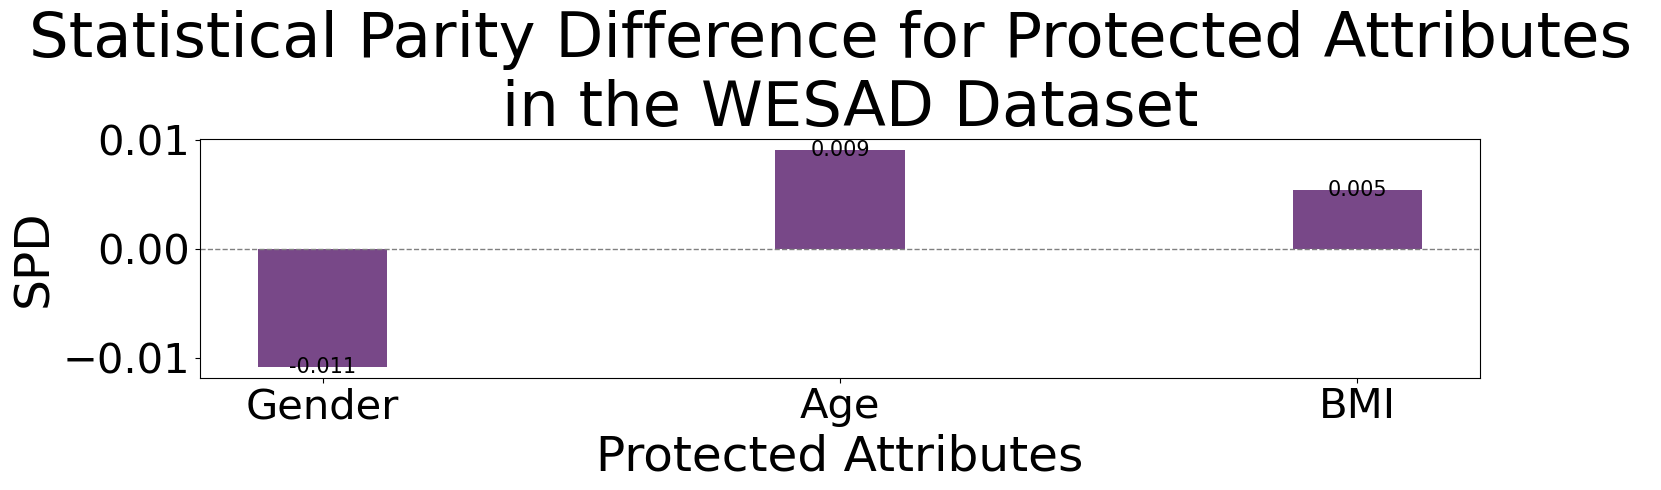

In [19]:
# Corrected assignments for each measure
spd_madrs = np.array([-0.010835, 0.009064, 0.005424])  

attributes = ['Gender', 'Age', 'BMI']
x = np.arange(len(attributes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x, spd_madrs, width, label='MADRS')  # Center the bars at 'x'
# Add a dashed horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel('SPD')
ax.set_title('Statistical Parity Difference for Protected Attributes \n in the WESAD Dataset')
ax.set_xticks(x)  # Ensure x-ticks align with the bar centers
ax.set_xticklabels(attributes)
plt.xlabel('Protected Attributes')
# ax.legend()  # Remove or comment out the legend

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -7),  # Adjusting the offset to be directly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', color='black', size=15)

autolabel(rects1)
fig.tight_layout()
plt.savefig("../visualizations/WESAD/spd-data-biasdepresjon.png",bbox_inches='tight')
plt.savefig("../visualizations/WESAD/spd-data-biasdepresjon.eps",bbox_inches='tight')
plt.show()

# Model bias

In [60]:
X_test = pd.read_csv('../data/wesad/predictions/wesad_X_test_generic.csv')
y_test = pd.read_csv('../data/wesad/predictions/wesad_y_test_generic.csv')
y_pred = pd.read_csv('../data/wesad/predictions/wesad_pred_generic.csv')

In [61]:
X_test['BMI'].value_counts()

BMI
2    10250
1     5120
Name: count, dtype: int64

In [62]:
print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any().any())
print("Missing values in y_pred:", y_pred.isna().any().any())

print((X_test.index == y_test.index).all())
print((X_test.index == y_pred.index).all())

protected_attributes = ['gender', 'age', 'BMI']
privileged_classes = [[0], [0], [1]]  # male, below 30 years old, normal BMI

# Create BinaryLabelDataset for true labels
true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['stress'],
    protected_attribute_names=protected_attributes
)

# Create BinaryLabelDataset for predicted labels
pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['stress'],
    protected_attribute_names=protected_attributes
)

# Define privileged and unprivileged groups
privileged_groups = [{'BMI': 1}]  # male, <30 years old, normal BMI
unprivileged_groups = [{'BMI': 2}]  # female, >=30 years old, 

# Metrics for the true dataset (to check fairness of the data itself)
dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

# Metrics for the predicted dataset (to check fairness of the model predictions)
classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

# Print results for dataset metrics (fairness of the dataset)
print("----------------")
print("Generic model - Dataset Fairness Metrics")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

# Print results for classification metrics (fairness of the model predictions)
print("----------------")
print("Generic model - Prediction Fairness Metrics")
print("----------------")
# Equal Opportunity Difference
#equal_opportunity_difference = classification_metric.equal_opportunity_difference()
#print("Equal Opportunity Difference:", equal_opportunity_difference)

# Average Odds Difference
#average_odds_difference = classification_metric.average_odds_difference()
#print("Average Odds Difference:", average_odds_difference)

Missing values in X_test: False
Missing values in y_test: False
Missing values in y_pred: False
True
True
----------------
Generic model - Dataset Fairness Metrics
----------------
Disparate Impact: 0.975609756097561
Statistical Parity Difference: -0.0060975609756097615
----------------
Generic model - Prediction Fairness Metrics
----------------
Equal Opportunity Difference: 0.5612625


In [63]:
X_test = pd.read_csv('../data/wesad/predictions/wesad_X_test_LOPO.csv')
y_test = pd.read_csv('../data/wesad/predictions/wesad_y_test_LOPO.csv')
y_pred = pd.read_csv('../data/wesad/predictions/wesad_y_pred_LOPO.csv')

In [64]:
y_test

category_madrs
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
...               ...
78761             0.0
78762             0.0
78763             0.0
78764             0.0
78765             0.0

[78766 rows x 1 columns]

In [65]:
print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any().any())
print("Missing values in y_pred:", y_pred.isna().any().any())

print((X_test.index == y_test.index).all())
print((X_test.index == y_pred.index).all())

protected_attributes = ['gender', 'age', 'BMI']
privileged_classes = [[0], [0], [1]]  # male, below 30 years old, normal BMI

# Create BinaryLabelDataset for true labels
true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['category_madrs'],
    protected_attribute_names=protected_attributes
)

# Create BinaryLabelDataset for predicted labels
pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['category_madrs'],
    protected_attribute_names=protected_attributes
)

# Define privileged and unprivileged groups
privileged_groups = [{'BMI': 1}]  # male, <30 years old, normal BMI
unprivileged_groups = [{'BMI': 2}]  # female, >=30 years old, 

# Metrics for the true dataset (to check fairness of the data itself)
dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

# Metrics for the predicted dataset (to check fairness of the model predictions)
classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

# Print results for dataset metrics (fairness of the dataset)
print("----------------")
print("Generic model - Dataset Fairness Metrics")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

# Print results for classification metrics (fairness of the model predictions)
print("----------------")
print("Generic model - Prediction Fairness Metrics")
print("----------------")
# Equal Opportunity Difference
equal_opportunity_difference = classification_metric.equal_opportunity_difference()
print("Equal Opportunity Difference:", equal_opportunity_difference)

# Average Odds Difference
#average_odds_difference = classification_metric.average_odds_difference()
#print("Average Odds Difference:", average_odds_difference)

Missing values in X_test: False
Missing values in y_test: False
Missing values in y_pred: False
True
True
----------------
Generic model - Dataset Fairness Metrics
----------------
Disparate Impact: 0.9687006518670839
Statistical Parity Difference: -0.007965299448904228
----------------
Generic model - Prediction Fairness Metrics
----------------
Equal Opportunity Difference: 0.22823438512579153


In [66]:
dir_data = {
    'Model': ['stress'],
    'Generic': [0.98],
    'Personalized': [0.97]
}

spd_data = {
    'Model': ['stress'],
    'Generic': [-0.01],
    'Personalized': [-0.01]
}

dir_df = pd.DataFrame(dir_data)
spd_df = pd.DataFrame(spd_data)

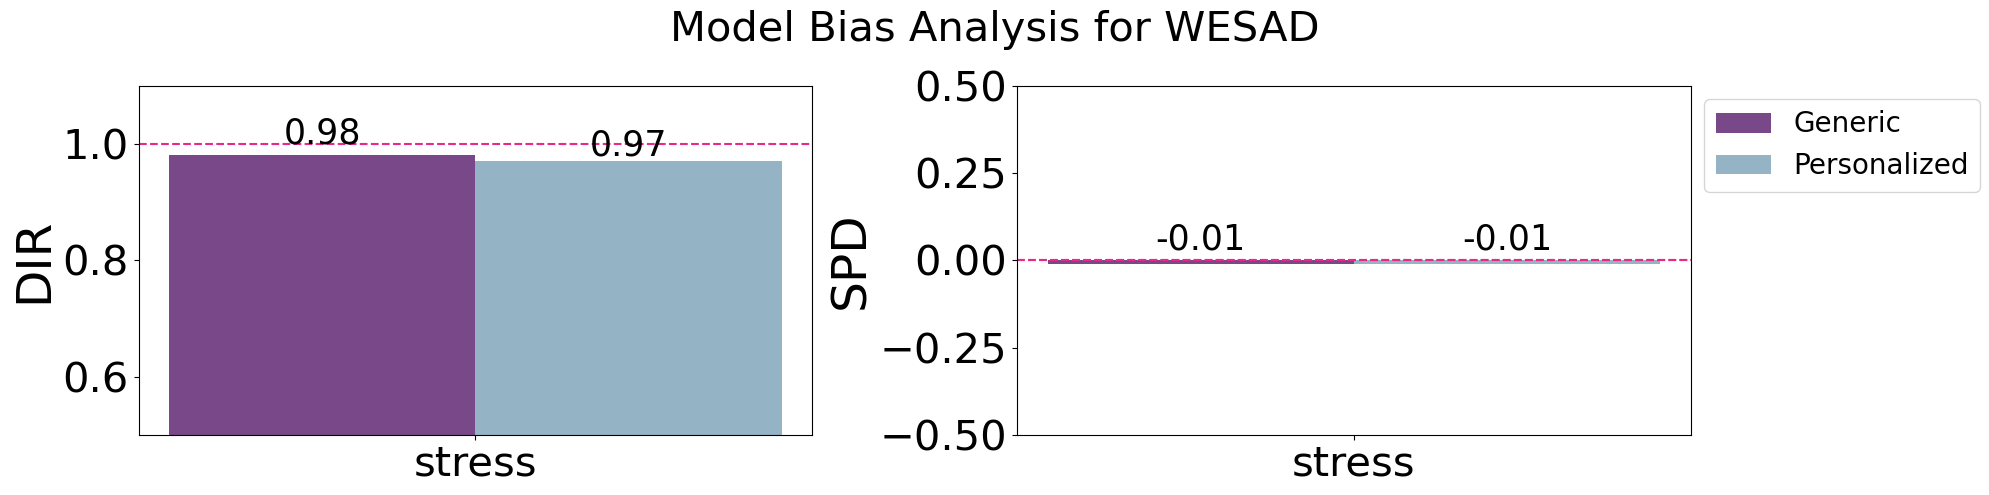

In [78]:
dir_df_visual = dir_df.replace(np.inf, dir_df['Generic'].max() * 1.5)  

fig, axes = plt.subplots(1, 2, figsize=(20, 5), tight_layout=True)

bar_positions_generic = np.arange(len(dir_df['Model']))  # generic model bar positions
bar_positions_personalized = bar_positions_generic + width  

axes[0].bar(bar_positions_generic, dir_df_visual['Generic'], width, label='Generic')
axes[0].bar(bar_positions_personalized, dir_df_visual['Personalized'], width, label='Personalized')
axes[0].axhline(y=1, color='#e72a8a', linestyle='--')

# Adding text labels above bars for DIR
for index, value in enumerate(dir_df['Generic']):
    axes[0].text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=25)
for index, value in enumerate(dir_df['Personalized']):
    if np.isinf(value):  # Handle the case for infinity
        axes[0].text(index + width, dir_df_visual['Personalized'].iloc[0], '∞', ha='center', fontsize=25)
    else:
        axes[0].text(index + width, value + 0.01, f'{value:.2f}', ha='center', fontsize=25)

# Set labels and titles for DIR
axes[0].set_ylabel('DIR')
axes[0].set_xticks(bar_positions_generic + width / 2)
axes[0].set_xticklabels(dir_df['Model'])
axes[0].set_ylim(0.5, 1.1)

# Bar plot for SPD
axes[1].bar(bar_positions_generic, spd_df['Generic'], width, label='Generic')
axes[1].bar(bar_positions_personalized, spd_df['Personalized'], width, label='Personalized')
axes[1].axhline(y=0, color='#e72a8a', linestyle='--')

# Adding text labels above bars for SPD
for index, value in enumerate(spd_df['Generic']):
    axes[1].text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom' if value < 0 else 'bottom', fontsize=25)
for index, value in enumerate(spd_df['Personalized']):
    axes[1].text(index + width, value + 0.02, f'{value:.2f}', ha='center', va='bottom' if value < 0 else 'bottom', fontsize=25)

# Set labels and titles for SPD
axes[1].set_ylabel('SPD')
axes[1].set_xticks(bar_positions_generic + width / 2)
axes[1].set_xticklabels(spd_df['Model'])
axes[1].axhline(y=0, color='#e72a8a', linestyle='--')
axes[1].set_ylim(-0.5, 0.5)

# Add legend and title
#axes[0].legend()
axes[1].legend(bbox_to_anchor=(1.45, 1), fontsize=20)
fig.suptitle('Model Bias Analysis for WESAD', size=30)

plt.savefig("../visualizations/wesad/wesad-model-bias.png",bbox_inches='tight')
plt.savefig("../visualizations/wesad/wesad-model-bias.eps",bbox_inches='tight')

plt.show()